In [96]:
import numpy as np
import pandas as pd
from sklearn.model_selection  import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.cluster import KMeans

from scipy.stats import zscore

from sklearn.model_selection import GridSearchCV
from scipy.spatial.distance import cdist

from sklearn import svm

from sklearn.decomposition import PCA

import warnings
warnings.simplefilter('ignore')

# Part A

In [97]:

missing_values=['nan','n/p','?',' ']
car_name= pd.read_csv('carName.csv',na_values=missing_values)

car_name

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino
...,...
393,ford mustang gl
394,vw pickup
395,dodge rampage
396,ford ranger


In [98]:


car_attributes=pd.read_json('Car-attributes.json')

car_attributes.nunique()

mpg       129
cyl         5
disp       82
hp         94
wt        351
acc        95
yr         13
origin      3
dtype: int64

In [99]:


cars=pd.concat([car_name,car_attributes], axis=1)

cars

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1


In [100]:


cars.describe().iloc[3:,:]


,mpg,cyl,disp,wt,acc,yr,origin
min,9.0,3.0,68.00,1613.00,8.000,70.0,1.0
25%,17.5,4.0,104.25,2223.75,13.825,73.0,1.0
50%,23.0,4.0,148.50,2803.50,15.500,76.0,1.0
75%,29.0,8.0,262.00,3608.00,17.175,79.0,2.0
max,46.6,8.0,455.00,5140.00,24.800,82.0,3.0


In [101]:
# checking datatype of 'HP' column

cars.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

In [102]:


cars.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [103]:
#HP is continuous variable but its datatype is Object, will try to convert it into numeric

#cars['hp'].astype('float64')

In [104]:
# check different types of null values eg. ?

temp=cars[cars['hp']=='?']
temp

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,?,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,?,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,?,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,?,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,?,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,?,3035,20.5,82,1


In [105]:
cars[cars['hp']=='?'].count()['hp']

6

In [106]:
# We have 6 '?' marks in HP columns

print('Percentage:', cars[cars['hp']=='?'].count()['hp']/cars.count()['hp'] * 100, '%')

Percentage: 1.507537688442211 %


In [107]:
# Will impute the null/ unexpected value with mean

cars['hp']=cars['hp'].replace('?',np.nan)

cars.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [108]:
cars=cars.fillna(cars['hp'].median())

cars.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [109]:


cars[cars.duplicated()]

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin


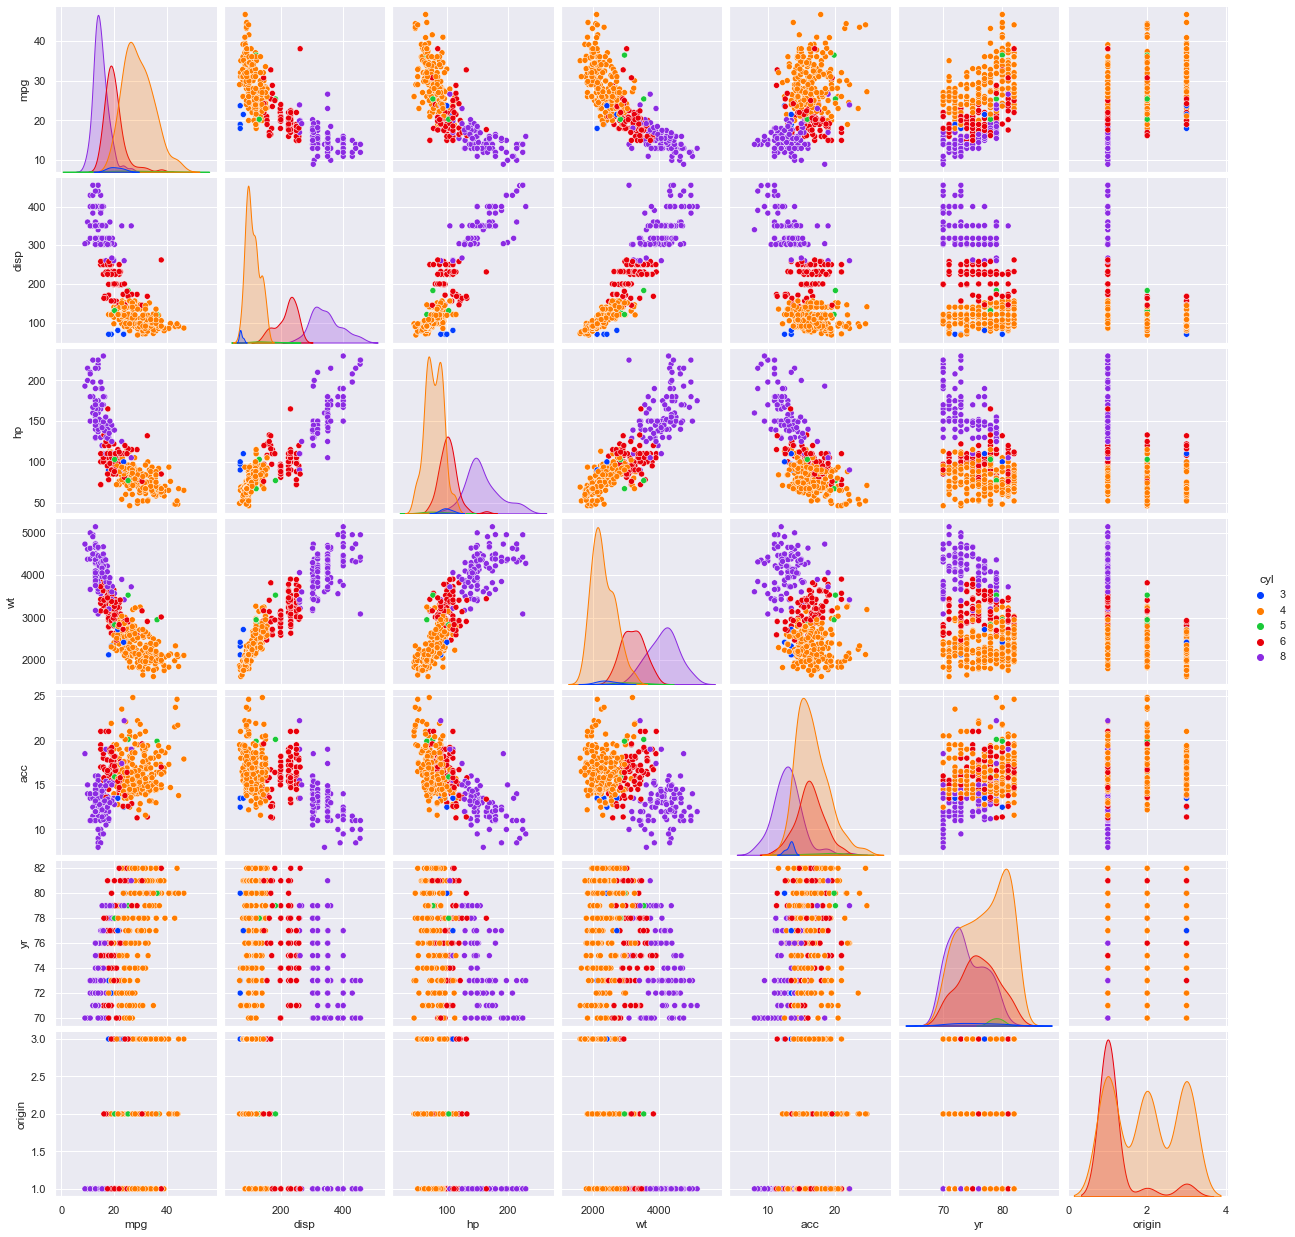

In [110]:


sns.pairplot(cars,hue='cyl', palette='bright')

<AxesSubplot:xlabel='wt', ylabel='disp'>

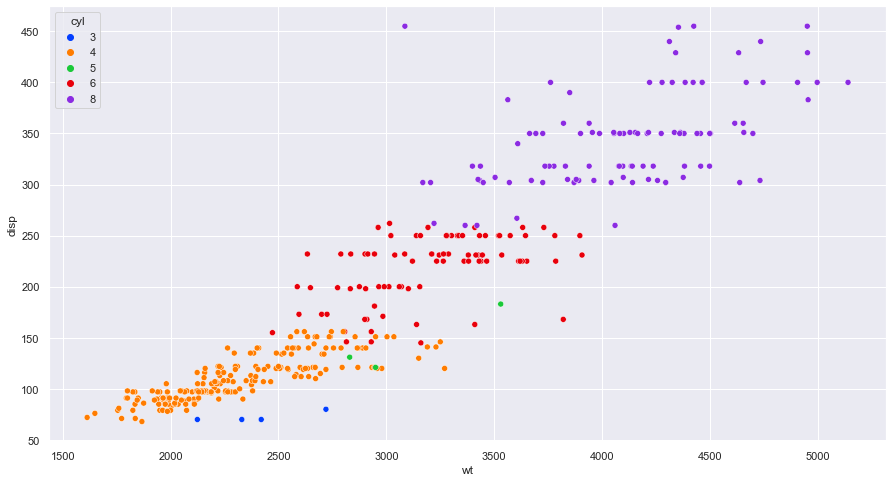

In [111]:



sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data=cars, x='wt',y='disp', hue='cyl', palette='bright')



In [112]:
cars['cyl'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cyl, dtype: int64

<AxesSubplot:xlabel='wt', ylabel='mpg'>

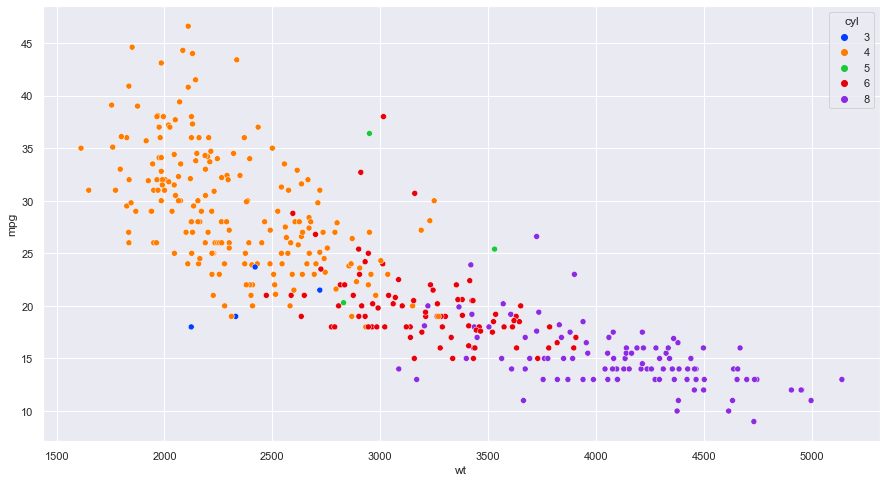

In [113]:


sns.scatterplot(data=cars, x='wt', y='mpg', hue='cyl', palette='bright')

In [114]:


new_cars=cars.drop('car_name', axis=1)
clusters=range(2,11)
meanDistortions=[]

# Normalization on data

new_cars=new_cars.apply(zscore)

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(new_cars)
    prediction=model.predict(new_cars)
    meanDistortions.append(sum(np.min(cdist(new_cars, model.cluster_centers_, 'euclidean'), axis=1)) / new_cars.shape[0])

    
cluster_dev=pd.DataFrame(meanDistortions,index=clusters, columns=['Distortions'])

cluster_dev

,Distortions
2,1.914462
3,1.630974
4,1.479177
5,1.336291
6,1.279022
7,1.215322
8,1.188765
9,1.133587
10,1.110797


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

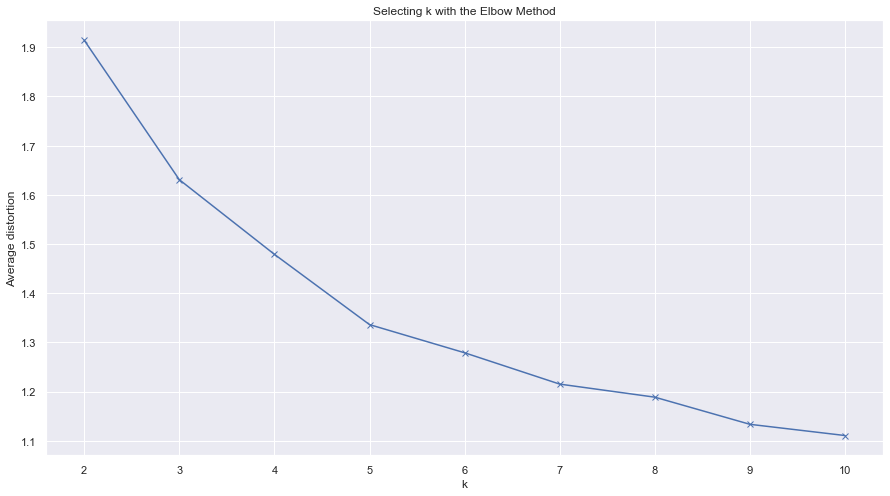

In [115]:


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [116]:


# Let us first start with K = 5
final_model1=KMeans(5)
final_model1.fit(new_cars)
prediction=final_model1.predict(new_cars)


In [117]:


#Append the prediction 

cars["GROUP"] = prediction
new_cars["GROUP"] = prediction
print("Groups Assigned : \n")
new_cars.sample(10)

Groups Assigned : 



,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
382,1.343225,-0.856321,-0.820308,-0.898609,-0.857702,0.483588,1.621983,1.781589,0
301,1.368846,-0.856321,-0.849116,-0.898609,-0.910907,-0.859804,0.809631,-0.715145,3
370,0.958913,-0.856321,-0.781898,-0.505677,-0.467528,0.229433,1.621983,-0.715145,3
181,1.215121,-0.856321,-0.983552,-1.343932,-1.389757,0.701436,-0.273506,1.781589,0
383,1.855641,-0.856321,-0.983552,-0.977195,-1.188758,-0.206262,1.621983,1.781589,0
47,-0.578335,0.320935,0.543257,-0.112746,0.368389,-0.206262,-1.356642,-0.715145,1
387,1.855641,0.320935,0.658488,-0.505677,0.052703,0.519896,1.621983,-0.715145,3
227,-0.578335,0.320935,0.303193,-0.112746,0.779845,0.774051,0.268063,-0.715145,1
12,-1.090751,1.498191,1.983643,1.197027,0.934732,-2.203196,-1.627426,-0.715145,2
315,0.100616,-0.856321,-0.407398,-0.374700,0.038515,1.645441,1.080415,-0.715145,3


In [118]:
cars.sample(10)


,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
318,toyota corona liftback,29.8,4,134.0,90.0,2711,15.5,80,3,0
156,pontiac catalina,16.0,8,400.0,170.0,4668,11.5,75,1,2
278,volkswagen scirocco,31.5,4,89.0,71.0,1990,14.9,78,2,0
372,pontiac phoenix,27.0,4,151.0,90.0,2735,18.0,82,1,3
26,chevy c20,10.0,8,307.0,200.0,4376,15.0,70,1,2
145,datsun 710,32.0,4,83.0,61.0,2003,19.0,74,3,0
148,fiat 124 tc,26.0,4,116.0,75.0,2246,14.0,74,2,4
254,ford fairmont (auto),20.2,6,200.0,85.0,2965,15.8,78,1,1
192,chevrolet nova,22.0,6,250.0,105.0,3353,14.5,76,1,1
173,datsun 710,24.0,4,119.0,97.0,2545,17.0,75,3,4


In [119]:
cars['GROUP'].value_counts()

2    94
4    84
1    81
0    72
3    67
Name: GROUP, dtype: int64

In [120]:


cars_mean = cars.groupby(['GROUP'])
temp=pd.DataFrame(cars_mean.mean())
temp




,mpg,cyl,disp,hp,wt,acc,yr,origin
GROUP,,,,,,,,
0,34.137500,4.083333,99.527778,72.875000,2155.819444,16.734722,79.416667,2.763889
1,19.104938,6.222222,233.444444,101.882716,3298.580247,16.632099,75.703704,1.037037
2,14.429787,8.000000,350.042553,162.393617,4157.978723,12.576596,73.468085,1.000000
3,28.791045,4.194030,132.567164,82.865672,2563.805970,16.549254,79.671642,1.074627
4,24.619048,4.047619,108.601190,85.672619,2347.619048,16.107143,73.309524,2.107143


array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'origin'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[GROUP]'>]],
      dtype=object)

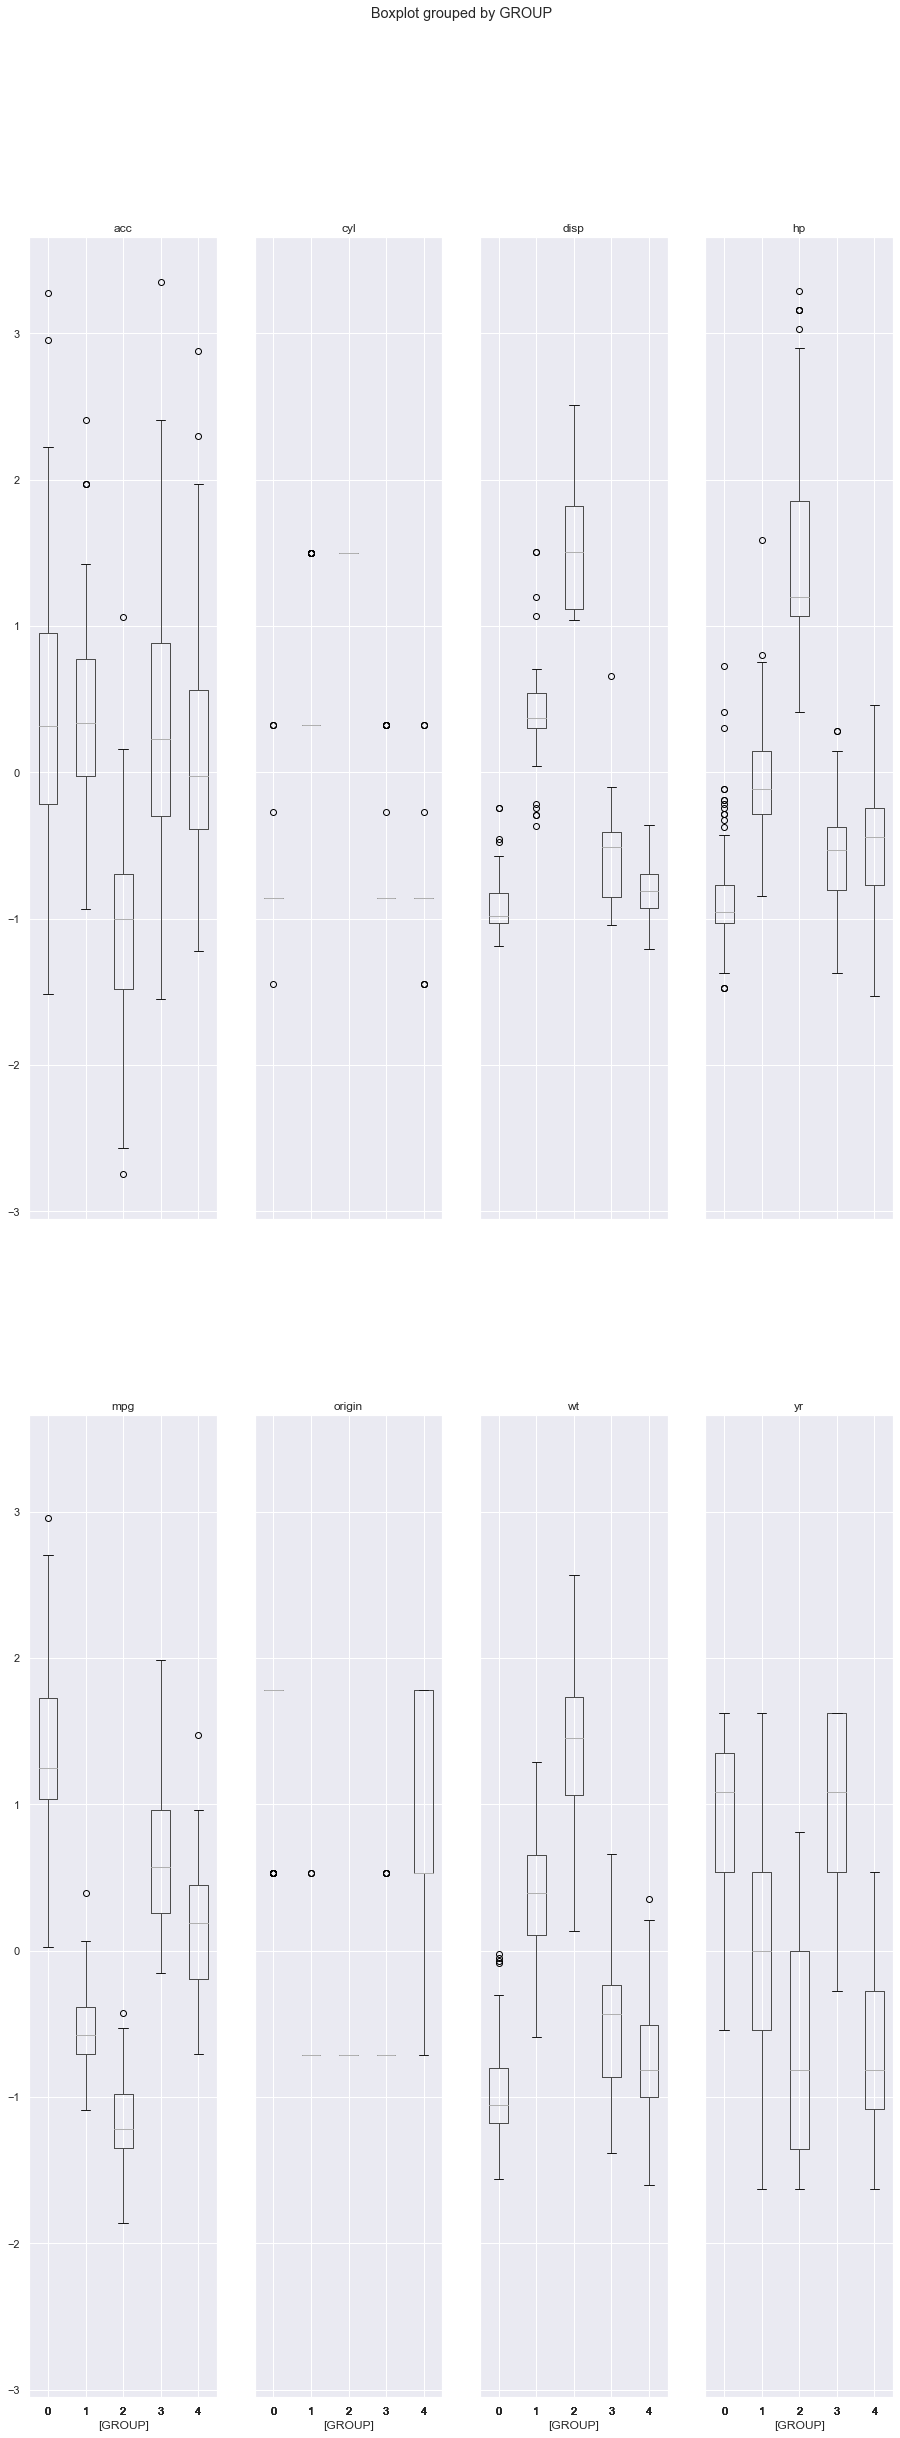

In [121]:
new_cars.boxplot(by='GROUP', layout = (2,4),figsize=(15,40) )

<AxesSubplot:xlabel='cyl', ylabel='mpg'>

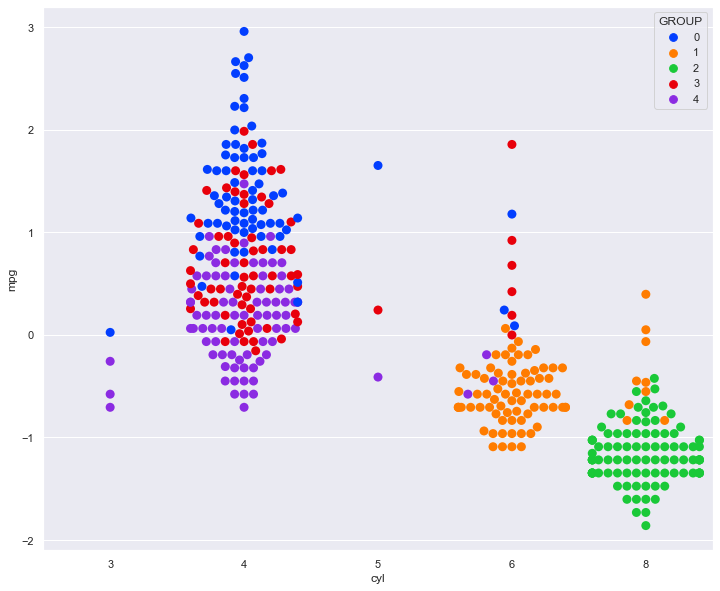

In [122]:
fig, ax = plt.subplots(figsize=(12,10))
sns.swarmplot(y=new_cars['mpg'], x=cars['cyl'], hue=new_cars['GROUP'], data=new_cars, ax=ax, size=9, palette='bright')

<AxesSubplot:xlabel='cyl', ylabel='acc'>

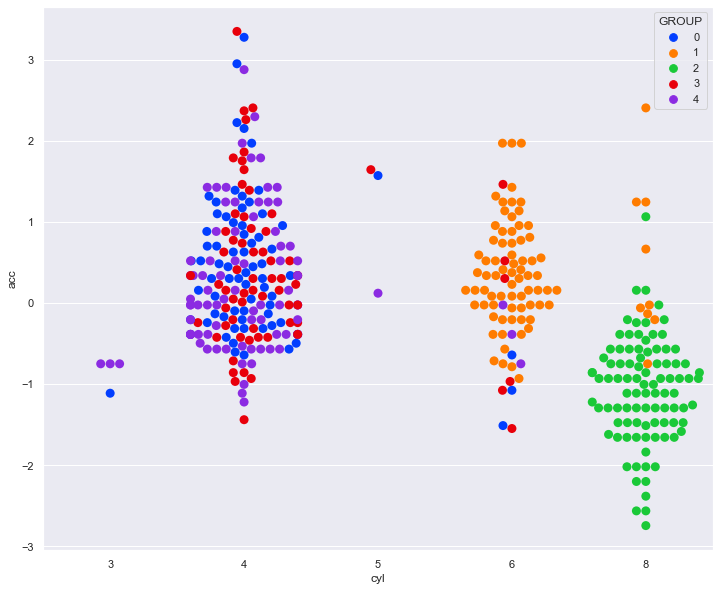

In [123]:
fig, ax = plt.subplots(figsize=(12,10))
sns.swarmplot(y=new_cars['acc'], x=cars['cyl'], hue=new_cars['GROUP'], data=new_cars, ax=ax, size=9, palette='bright')


<AxesSubplot:xlabel='cyl', ylabel='disp'>

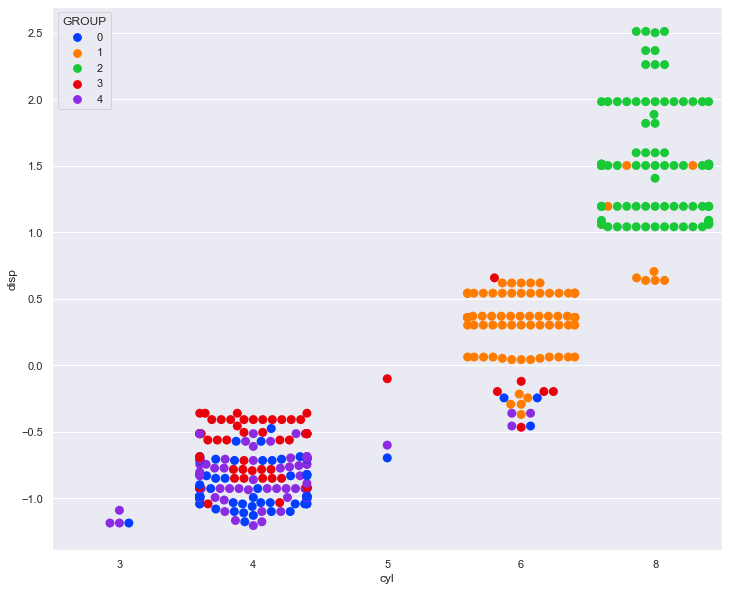

In [124]:
fig, ax = plt.subplots(figsize=(12,10))
sns.swarmplot(y=new_cars['disp'], x=cars['cyl'], hue=new_cars['GROUP'], data=new_cars, ax=ax, size=9, palette='bright')


<AxesSubplot:xlabel='cyl', ylabel='wt'>

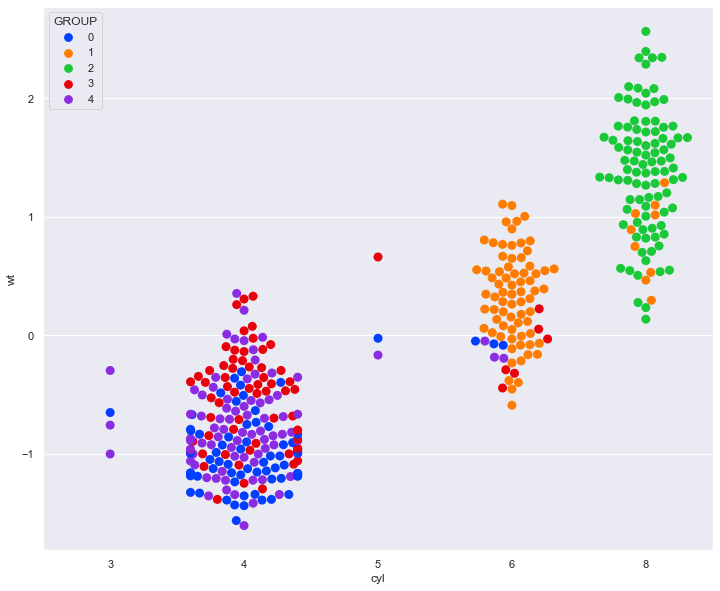

In [125]:
fig, ax = plt.subplots(figsize=(12,10))
sns.swarmplot(y=new_cars['wt'], x=cars['cyl'], hue=new_cars['GROUP'], data=new_cars, ax=ax, size=9, palette='bright')


In [126]:


ip=np.array([[27.0,4,140.0,86.0,2790,15.6,82,1]])


temp=cars.drop('car_name', axis=1)
temp.drop('GROUP', axis=1, inplace=True)
cols=temp.columns
i=0
for col in cols:
    ip[:,i:i+1]=(ip[:,i:i+1]-cars[col].mean())/cars[col].std()
    i=i+1
    
op=final_model1.predict(ip)
print('Class:',op[0])

Class: 3


# Part B

In [127]:


missing_values=['nan','n/p','?',' ']
vehicle= pd.read_csv('vehicle.csv',na_values=missing_values)

vehicle

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


In [128]:


vehicle.isnull().sum()


compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [129]:
percent_missing = vehicle.isnull().sum() * 100 / len(vehicle)
missing_value_df = pd.DataFrame({'column_name': vehicle.columns,
                                 'percent_missing': percent_missing})



In [130]:
print("Missing Value percentage:")
missing_value_df

Missing Value percentage:


,column_name,percent_missing
compactness,compactness,0.000000
circularity,circularity,0.591017
distance_circularity,distance_circularity,0.472813
radius_ratio,radius_ratio,0.709220
pr.axis_aspect_ratio,pr.axis_aspect_ratio,0.236407
max.length_aspect_ratio,max.length_aspect_ratio,0.000000
scatter_ratio,scatter_ratio,0.118203
elongatedness,elongatedness,0.118203
pr.axis_rectangularity,pr.axis_rectangularity,0.354610
max.length_rectangularity,max.length_rectangularity,0.000000


In [131]:
vehicle.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [132]:
# replacing the null value with median

col=list(vehicle.columns)
col
col.remove('class')

for cols in col:
    med=vehicle[cols].median()
    vehicle[cols].fillna(med,inplace=True)
    

In [133]:
vehicle.isnull().sum()


compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

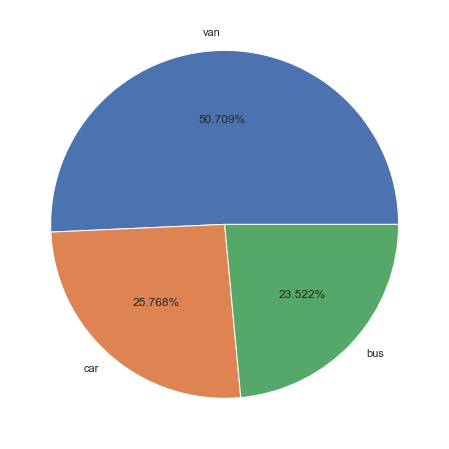

In [134]:


plt.pie(vehicle['class'].value_counts(), labels= vehicle['class'].unique(), autopct='%.3f%%'  )

plt.show()

In [135]:
print('Percentage of values in class:')
vehicle['class'].value_counts()/len(vehicle)*100


Percentage of values in class:


car    50.709220
bus    25.768322
van    23.522459
Name: class, dtype: float64

In [136]:


vehicle.duplicated().sum()


0

In [137]:


X=vehicle.drop('class', axis=1)

y=vehicle['class']

In [138]:


# Making data standardize

X_scaled=X.apply(zscore)
X_scaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.518073,0.057177,0.273363,1.310398,0.311542,-0.207598,0.136262,-0.224342,0.758332,-0.401920,-0.341934,0.285705,-0.327326,-0.073812,0.380870,-0.312012,0.183957
1,-0.325470,-0.623732,0.120741,-0.835032,-0.593753,0.094079,-0.599423,0.520519,-0.610886,-0.344578,-0.593357,-0.619724,-0.513630,-0.059384,0.538390,0.156798,0.013265,0.452977
2,1.254193,0.844303,1.519141,1.202018,0.548738,0.311542,1.148719,-1.144597,0.935290,0.689401,1.097671,1.109379,1.392477,0.074587,1.558727,-0.403383,-0.149374,0.049447
3,-0.082445,-0.623732,-0.006386,-0.295813,0.167907,0.094079,-0.750125,0.648605,-0.610886,-0.344578,-0.912419,-0.738777,-1.466683,-1.265121,-0.073812,-0.291347,1.639649,1.529056
4,-1.054545,-0.134387,-0.769150,1.082192,5.245643,9.444962,-0.599423,0.520519,-0.610886,-0.275646,1.671982,-0.648070,0.408680,7.309005,0.538390,-0.179311,-1.450481,-1.699181


In [139]:


X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.25, random_state=1)
svm_base=svm.SVC()

svm_base.fit(X_train, y_train)


SVC()

Accuracy of train data: 0.973186119873817
Precision of train data: 0.9715839679808908
Recall of train data: 0.9697749562019028
Classficatioin Report of train data:
               precision    recall  f1-score   support

         bus       0.99      0.98      0.98       166
         car       0.98      0.98      0.98       322
         van       0.95      0.95      0.95       146

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634

Confusion matrix:
      bus  car  van
bus  162    1    3
car    1  316    5
van    0    7  139


<AxesSubplot:>

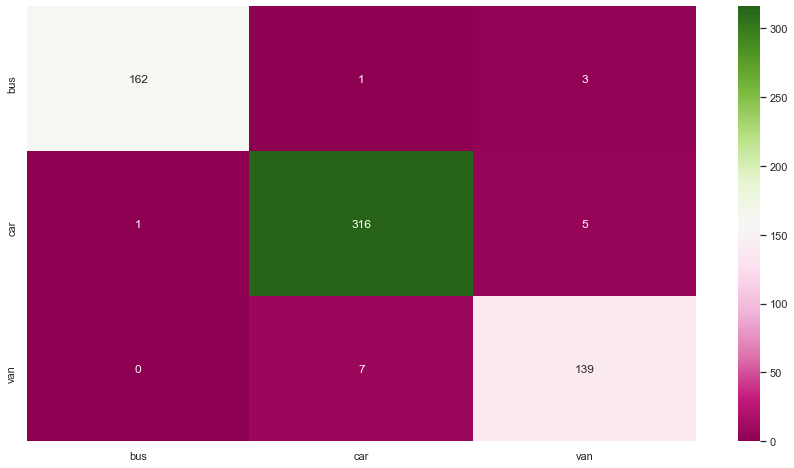

In [140]:


y_pred=svm_base.predict(X_train)
print("Accuracy of train data:", metrics.accuracy_score(y_train, y_pred))
print("Precision of train data:", metrics.precision_score(y_train, y_pred, average='macro'))
print("Recall of train data:", metrics.recall_score(y_train, y_pred, average='macro'))

print("Classficatioin Report of train data:\n", metrics.classification_report(y_train, y_pred))


cm=metrics.confusion_matrix(y_train, y_pred, labels=['bus','car','van'])

df_cm=pd.DataFrame(cm, index=[i for i in['bus','car','van']],
                        columns=[i for i in['bus','car','van']])


print("Confusion matrix:\n", df_cm)

sns.heatmap(df_cm, annot=True, fmt='g', cmap="PiYG")

In [141]:


pca=PCA(n_components=10)
pca.fit(X_scaled)

PCA(n_components=10)

In [142]:


print(pca.explained_variance_)

[9.40460261 3.01492206 1.90352502 1.17993747 0.91726063 0.53999263
 0.35887012 0.22193246 0.1606086  0.09185722]


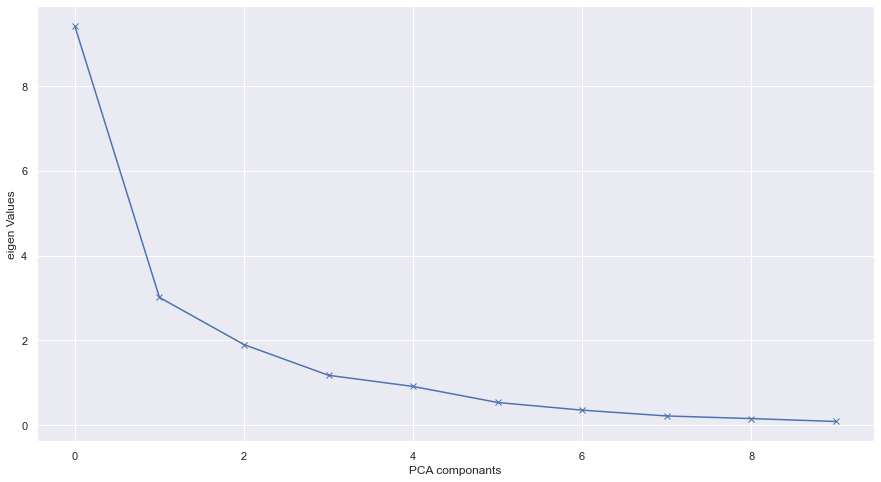

In [143]:
arr=np.arange(0,10)

plt.plot(arr, pca.explained_variance_, 'bx-')
plt.ylabel('eigen Values')
plt.xlabel('PCA componants')
plt.show()

In [144]:
print(pca.components_)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

In [145]:
print(pca.explained_variance_ratio_)

[0.52186034 0.16729768 0.10562639 0.0654746  0.05089869 0.02996413
 0.01991366 0.01231501 0.00891215 0.00509715]


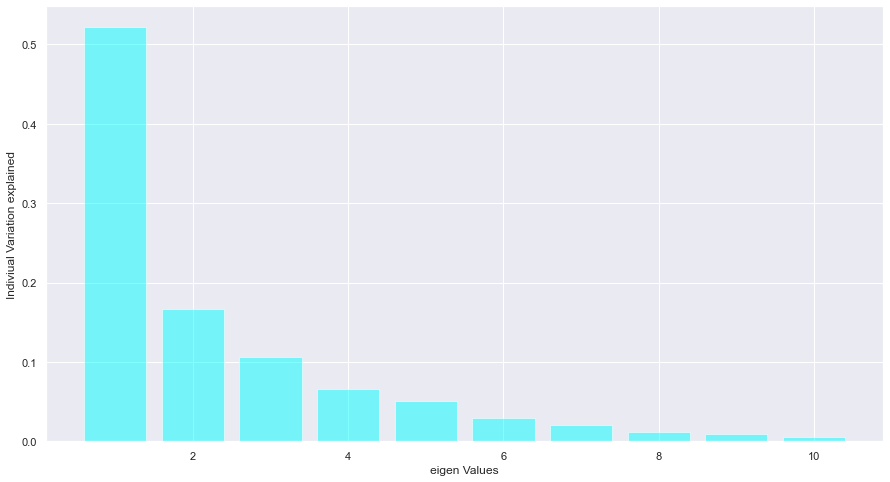

In [146]:
plt.bar(list(range(1,11)),pca.explained_variance_ratio_,alpha=0.5, align='center', color='cyan')
plt.ylabel('Indiviual Variation explained')
plt.xlabel('eigen Values')
plt.show()

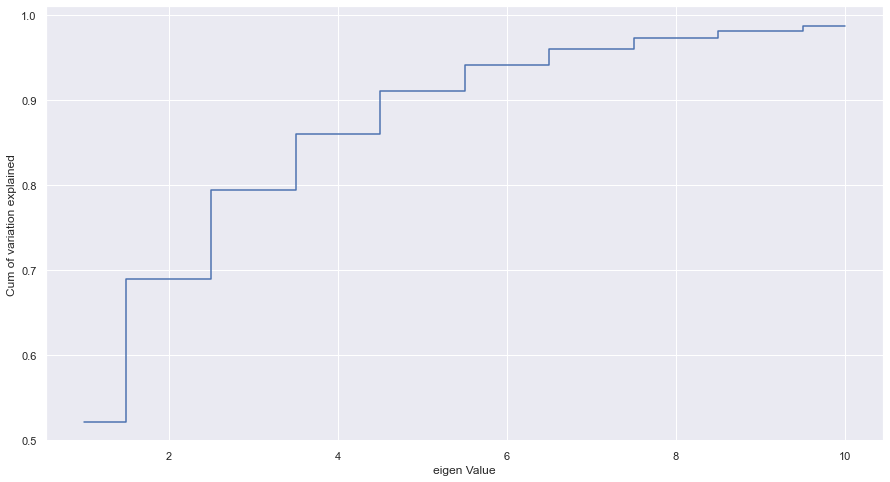

In [147]:
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

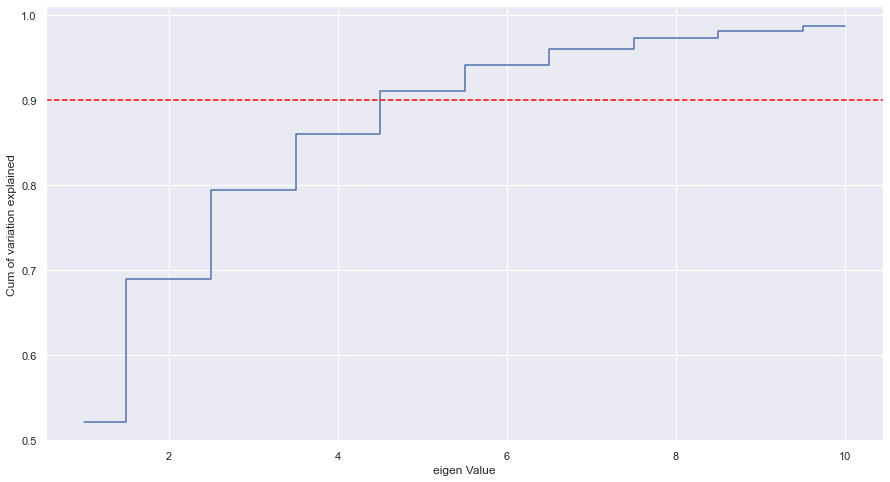

In [148]:


plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.axhline(0.90, 0, 10, color='red',ls='--' )
plt.show()

In [149]:


pca1=PCA(n_components=6)
pca1.fit(X_scaled)

PCA(n_components=6)

In [150]:
pca1.explained_variance_

array([9.40460261, 3.01492206, 1.90352502, 1.17993747, 0.91726063,
       0.53999263])

In [151]:
px_data=pca1.transform(X_scaled)

px_data.shape

(846, 6)

In [152]:


px_train, px_test, py_train, py_test=train_test_split(px_data, y,test_size=0.25, random_state=1)

p_svm=svm.SVC()

p_svm.fit(px_train, py_train)



SVC()

In [153]:


py_pred=p_svm.predict(px_train)
print("Accuracy:", metrics.accuracy_score(py_train, py_pred))
print("Precision:", metrics.precision_score(py_train, py_pred, average='macro'))
print("Recall:", metrics.recall_score(py_train, py_pred, average='macro'))

print("Classfication Report:\n",metrics.classification_report(py_train, py_pred))

Accuracy: 0.8990536277602523
Precision: 0.8966346134836359
Recall: 0.88835970103506
Classfication Report:
               precision    recall  f1-score   support

         bus       0.92      0.87      0.90       166
         car       0.90      0.93      0.92       322
         van       0.86      0.86      0.86       146

    accuracy                           0.90       634
   macro avg       0.90      0.89      0.89       634
weighted avg       0.90      0.90      0.90       634



In [154]:


parameters = {'C':[0.1,1,10,100],'gamma':[0.01,0.1,1,10]}
clf=GridSearchCV(p_svm,parameters,refit=True,verbose=2)

clf.fit(px_train, py_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=10 .................................................
[CV] .................................. C=0.1, gamma=10, total=   0.0s
[CV] C=0.1, gamma=10 .................................................
[CV] .................................. C=0.1, gamma=10, total=   0.0s
[CV] C=0.1, gamma=10 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.3s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]},
             verbose=2)

In [155]:


print("Best hyper parameters:")
clf.best_estimator_

Best hyper parameters:


SVC(C=10, gamma=0.1)

In [156]:


py_pred=clf.predict(px_train)
print("Accuracy:", metrics.accuracy_score(py_train, py_pred))
print("Precision:", metrics.precision_score(py_train, py_pred, average='macro'))
print("Recall:", metrics.recall_score(py_train, py_pred, average='macro'))
print("Classfication Report:\n",metrics.classification_report(py_train, py_pred))

Accuracy: 0.9589905362776026
Precision: 0.9532490167073542
Recall: 0.9587875880275974
Classfication Report:
               precision    recall  f1-score   support

         bus       0.96      0.96      0.96       166
         car       0.97      0.96      0.97       322
         van       0.93      0.96      0.94       146

    accuracy                           0.96       634
   macro avg       0.95      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



In [157]:
# Checking metrics on test data for hyper tunned PCA model

py_predt=clf.predict(px_test)
print("Accuracy:", metrics.accuracy_score(py_test, py_predt))
print("Precision:", metrics.precision_score(py_test, py_predt, average='macro'))
print("Recall:", metrics.recall_score(py_test, py_predt, average='macro'))
print("Classfication Report:\n",metrics.classification_report(py_test, py_predt))

Accuracy: 0.9150943396226415
Precision: 0.9054700854700855
Recall: 0.9212231370580867
Classfication Report:
               precision    recall  f1-score   support

         bus       0.92      0.92      0.92        52
         car       0.96      0.90      0.93       107
         van       0.83      0.94      0.88        53

    accuracy                           0.92       212
   macro avg       0.91      0.92      0.91       212
weighted avg       0.92      0.92      0.92       212

